In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
import shutil

# Set the path to your dataset
data_path = "D:/DATASET/CNN/steatosis/trying1"

# Define constants
IMG_SIZE = (299, 299)
BATCH_SIZE = 32

In [2]:
# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Load data using ImageDataGenerator with data augmentation
train_generator = datagen.flow_from_directory(
    data_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

Found 38516 images belonging to 4 classes.


Class distribution before resampling:
{0: 3812, 1: 22752, 2: 11933, 3: 19}


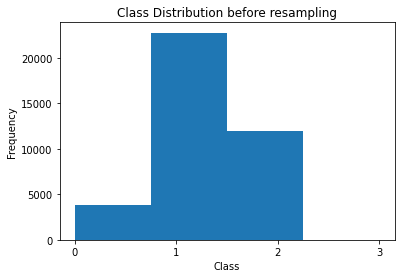

In [3]:
# Calculate class distribution
class_distribution = train_generator.classes
unique_classes, class_counts = np.unique(class_distribution, return_counts=True)
print("Class distribution before resampling:")
print(dict(zip(unique_classes, class_counts)))

# Plot class distribution
plt.hist(class_distribution, bins=4)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution before resampling')
plt.xticks(np.arange(4), ['0', '1', '2', '3']) 
plt.show()

Class Distribution of Balanced Data:
0: 4000
1: 4000
2: 4000
3: 4000


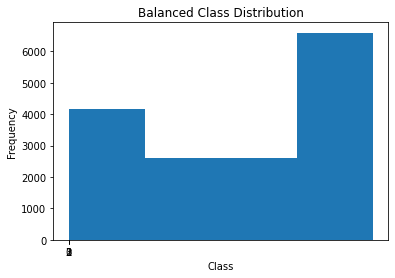

'\n# Move the balanced data to the new directory\nfor cls, samples in class_samples.items():\n    class_dir = os.path.join(new_data_path, str(cls))\n    os.makedirs(class_dir, exist_ok=True)\n    for sample in samples:\n        filename = os.path.basename(sample)\n        shutil.move(sample, os.path.join(class_dir, filename))\n'

In [4]:
# Define paths
data_path = "D:/DATASET/CNN/steatosis/trying1"  # Update with your actual data path
new_data_path = "D:/DATASET/CNN/steatosis/balanced_dataset"  # Update with your desired new data path

# Create new directory if it doesn't exist
os.makedirs(new_data_path, exist_ok=True)

# Define desired number of samples for each class
desired_samples = 4000

# Load samples for each class
class_samples = {}
for i in range(4):
    class_samples[i] = [os.path.join(data_path, str(i), file) for file in os.listdir(os.path.join(data_path, str(i)))]

# Downsample classes 1 and 2 to 4000 samples each
for i in [1, 2]:
    class_samples[i] = resample(class_samples[i], replace=False, n_samples=desired_samples, random_state=42)

# Oversample classes 0 and 3 to 4000 samples each
class_samples[0] = resample(class_samples[0], replace=True, n_samples=desired_samples, random_state=42)
class_samples[3] = resample(class_samples[3], replace=True, n_samples=desired_samples, random_state=42)

# Combine all classes
balanced_data = np.concatenate([class_samples[i] for i in range(4)])

# Calculate and print class distribution of balanced data
class_distribution = {str(i): len(class_samples[i]) for i in range(4)}
print("Class Distribution of Balanced Data:")
for cls, count in class_distribution.items():
    print(f"{cls}: {count}")

# Plot class distribution
plt.hist(balanced_data, bins=4)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Balanced Class Distribution')
plt.xticks(np.arange(4), ['0', '1', '2', '3'])  # Add class labels to x-axis ticks
plt.show()

'''
# Move the balanced data to the new directory
for cls, samples in class_samples.items():
    class_dir = os.path.join(new_data_path, str(cls))
    os.makedirs(class_dir, exist_ok=True)
    for sample in samples:
        filename = os.path.basename(sample)
        shutil.move(sample, os.path.join(class_dir, filename))
'''

In [ ]:
# Define the path to your dataset and the new directory
data_path = "D:/DATASET/CNN/steatosis/trying1"
new_data_path = "D:/DATASET/CNN/steatosis/balanced_dataset"

# Create the new directory if it doesn't exist
os.makedirs(new_data_path, exist_ok=True)

# Define constants
desired_samples = 2500  # The desired number of samples for each class

# Load samples for each class
class_samples = {}
for i in range(4):
    class_samples[i] = [os.path.join(data_path, str(i), file) for file in os.listdir(os.path.join(data_path, str(i)))]

# Oversample class 3 to 2500 samples
class_samples[3] = resample(class_samples[3], replace=True, n_samples=desired_samples - len(class_samples[3]), random_state=42)

# Resample classes 0, 1, and 2 to 2500 samples each
for i in range(3):
    class_samples[i] = resample(class_samples[i], replace=True, n_samples=desired_samples, random_state=42)

# Combine all classes
balanced_data = np.concatenate([class_samples[i] for i in range(4)])

# Calculate class distribution of balanced data
class_distribution = {str(i): len(class_samples[i]) for i in range(4)}

# Print class distribution
print("Class Distribution of Balanced Data:")
for cls, count in class_distribution.items():
    print(f"{cls}: {count}")

# Plot class distribution
plt.hist(balanced_data, bins=4)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Balanced Class Distribution')
plt.xticks(np.arange(4), ['0', '1', '2', '3'])  # Add class labels to x-axis ticks
plt.show()

# Move the balanced data to the new directory
for cls, samples in class_samples.items():
    class_dir = os.path.join(new_data_path, str(cls))
    os.makedirs(class_dir, exist_ok=True)
    for sample in samples:
        filename = os.path.basename(sample)
        try:
            shutil.move(sample, os.path.join(class_dir, filename))
        except FileNotFoundError as e:
            print(f"Error moving file: {e}")
            

In [ ]:
# Define the path to your dataset and the new directory
data_path = "D:/DATASET/CNN/steatosis/trying1"
new_data_path = "D:/DATASET/CNN/steatosis/balanced_dataset"

# Create the new directory if it doesn't exist
os.makedirs(new_data_path, exist_ok=True)

# Define constants
desired_samples = 2500  # The desired number of samples for each class

# Load samples for each class
class_samples = {}
for i in range(4):
    class_samples[i] = [os.path.join(data_path, str(i), file) for file in os.listdir(os.path.join(data_path, str(i)))]

# Oversample class 3 to 2500 samples
class_samples[3] = resample(class_samples[3], replace=True, n_samples=desired_samples - len(class_samples[3]), random_state=42)

# Resample classes 0, 1, and 2 to 2500 samples each
for i in range(3):
    class_samples[i] = resample(class_samples[i], replace=True, n_samples=desired_samples, random_state=42)

# Combine all classes
balanced_data = np.concatenate([class_samples[i] for i in range(4)])

# Calculate class distribution of balanced data
class_distribution = {str(i): len(class_samples[i]) for i in range(4)}

# Print class distribution
print("Class Distribution of Balanced Data:")
for cls, count in class_distribution.items():
    print(f"{cls}: {count}")

# Plot class distribution
plt.hist(balanced_data, bins=4)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Balanced Class Distribution')
plt.xticks(np.arange(4), ['0', '1', '2', '3'])  # Add class labels to x-axis ticks
plt.show()

# Move the balanced data to the new directory
for cls, samples in class_samples.items():
    class_dir = os.path.join(new_data_path, str(cls))
    os.makedirs(class_dir, exist_ok=True)
    for sample in samples:
        filename = os.path.basename(sample)
        shutil.move(sample, os.path.join(class_dir, filename))


In [ ]:
# Define constants
desired_samples = 4000  # The desired number of samples for each class

# Load samples for each class
class_0_samples = [os.path.join(data_path, '0', file) for file in os.listdir(os.path.join(data_path, '0'))]
class_1_samples = [os.path.join(data_path, '1', file) for file in os.listdir(os.path.join(data_path, '1'))]
class_2_samples = [os.path.join(data_path, '2', file) for file in os.listdir(os.path.join(data_path, '2'))]
class_3_samples = [os.path.join(data_path, '3', file) for file in os.listdir(os.path.join(data_path, '3'))]

# Resample data for classes 0, 1, and 2
class_0_samples = resample(class_0_samples, replace=False, n_samples=desired_samples, random_state=42)
class_1_samples = resample(class_1_samples, replace=False, n_samples=desired_samples, random_state=42)
class_2_samples = resample(class_2_samples, replace=False, n_samples=desired_samples, random_state=42)

# Oversample class 3
class_3_samples = resample(class_3_samples, replace=True, n_samples=desired_samples, random_state=42)

# Combine all classes
balanced_data = np.concatenate([class_0_samples, class_1_samples, class_2_samples, class_3_samples])

# Calculate class distribution of balanced data
class_distribution = {
    '0': len(class_0_samples),
    '1': len(class_1_samples),
    '2': len(class_2_samples),
    '3': len(class_3_samples)
}

# Print class distribution
print("Class Distribution of Balanced Data:")
for cls, count in class_distribution.items():
    print(f"{cls}: {count}")    

# Plot class distribution
plt.hist(balanced_data, bins=4)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Balanced Class Distribution')
plt.xticks(np.arange(4), ['0', '1', '2', '3'])  # Add class labels to x-axis ticks
plt.show()


In [ ]:
# Define the path to the new directory
new_data_path = "D:/DATASET/CNN/steatosis/balanced_dataset"
os.makedirs(new_data_path, exist_ok=True)

# Move the balanced data to the new directory
for sample in balanced_data:
    class_label = os.path.basename(os.path.dirname(sample))
    filename = os.path.basename(sample)
    
    # Create the directory for the class label if it doesn't exist
    class_dir = os.path.join(new_data_path, class_label)
    os.makedirs(class_dir, exist_ok=True)
    
    # Move the file to the new directory
    shutil.move(sample, os.path.join(class_dir, filename))

In [ ]:
# Load balanced data using ImageDataGenerator
balanced_train_generator = datagen.flow_from_directory(
    balanced_data_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

In [ ]:
# Define the ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Add custom layers on top of ResNet50
model = Sequential()
model.add(resnet_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit_generator(train_generator, epochs=5, steps_per_epoch=train_generator.samples // BATCH_SIZE)

# Save the model
model.save('model_steatosis.h5')

In [ ]:
# Plot class distribution after balancing
class_labels = ['NASH score 0', 'NASH score 1', 'NASH score 2', 'NASH score 3']
class_distribution = [sum(train_generator.classes == i) for i in range(4)]
plt.bar(class_labels, class_distribution)
plt.title('Balanced Class Distribution')
plt.xlabel('NASH Score')
plt.ylabel('Number of Images')
plt.show()

# Plot training history
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate_generator(train_generator)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

In [ ]:
# Prediction function
def predict_image(image_path):
    img = plt.imread(image_path)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    return predicted_class

# Test prediction
test_image_path = "D:\DATASET\CNN\steatosis\train\2\5_11_49.png"
predicted_class = predict_image(test_image_path)
print("Predicted class:", predicted_class)
